In [2]:
import matplotlib.pyplot
import numpy

In [3]:
lengths = range(2, 15)
letters = list("ABCDEFGHIJKLMNOPQRSTUVWXYZ")
heatmaps_letters = {}
heatmaps_words = {}
for char in letters:
    heatmaps_letters[char] = {}
    heatmaps_words[char] = {}
    for length in lengths:
        heatmaps_letters[char][length] = []
        heatmaps_words[char][length] = []
        for i in range(length):
            heatmaps_letters[char][length].append(0)
            heatmaps_words[char][length].append(0)

with open("data/ouestfrance.tsv", "r", encoding="utf8") as file:
    for line in file.readlines():
        word = line.strip().split("\t")[0]
        for i, char in enumerate(word):
            heatmaps_letters[char][len(word)][i] += 1
            heatmaps_words[char][len(word)][i] += 1

for char in letters:
    for length in lengths:
        total = sum(heatmaps_letters[char][length])
        if total == 0:
            continue
        for i in range(length):
            heatmaps_letters[char][length][i] /= total

for length in lengths:
    for i in range(length):
        total = sum([heatmaps_words[char][length][i] for char in letters])
        if total == 0:
            continue
        for char in letters:
            heatmaps_words[char][length][i] /= total

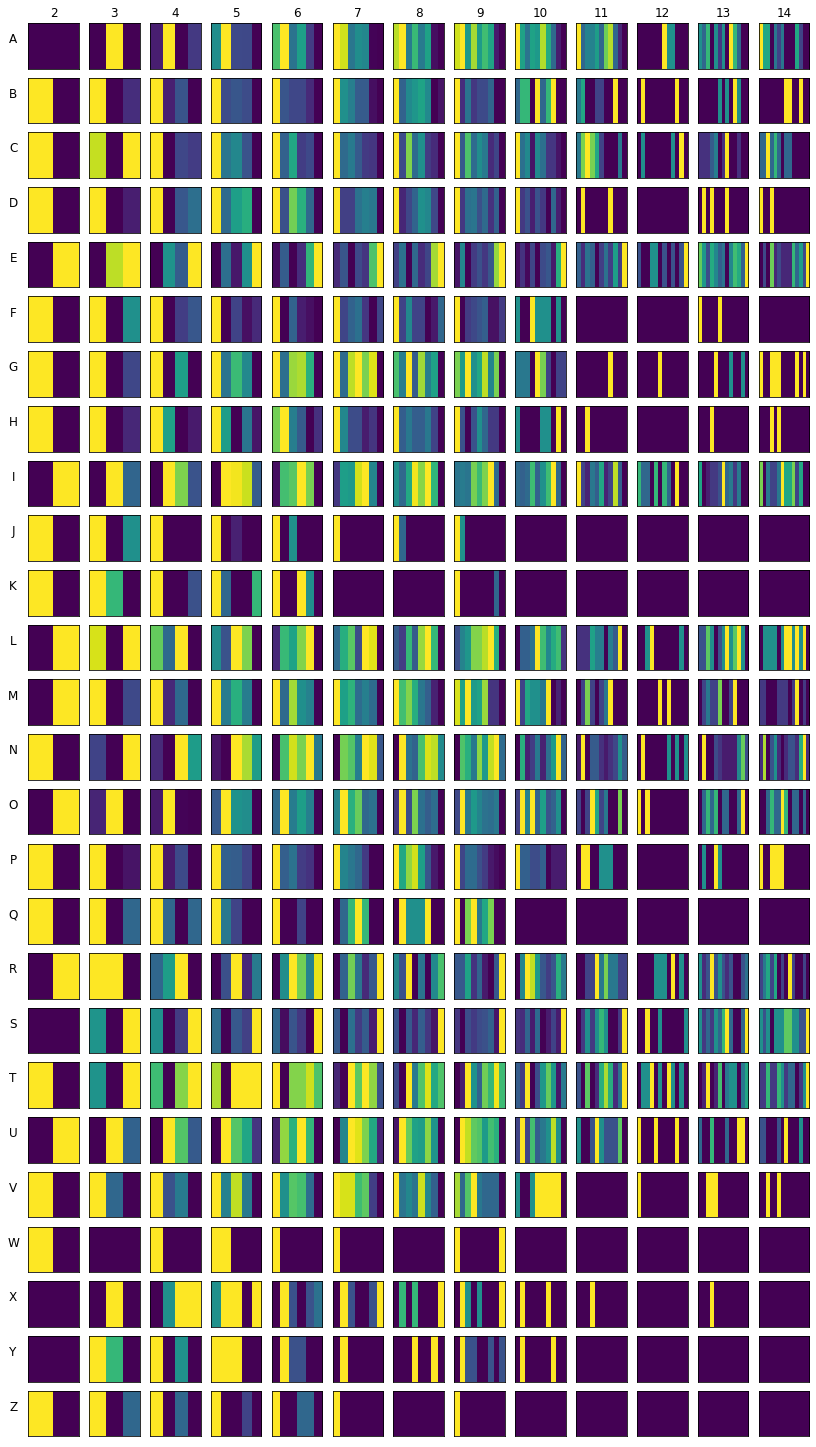

In [19]:
fig, axs = matplotlib.pyplot.subplots(
    nrows=len(letters),
    ncols=len(lengths),
    figsize=(14, 26)
)

# matplotlib.pyplot.suptitle("Distribution des lettres pour différentes longeurs de mots")

for i, char in enumerate(letters):
    for j, length in enumerate(lengths):
        arr = numpy.array(heatmaps_letters[char][length])
        arr = numpy.expand_dims(arr, axis=0)
        axs[i, j].imshow(arr, aspect="auto")
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])

for i, char in enumerate(letters):
    axs[i, 0].set_ylabel(char, rotation=0, size="large", labelpad=15)

for j, length in enumerate(lengths):
    axs[0, j].set_title(length)

matplotlib.pyplot.savefig("heatmap-letters.png")

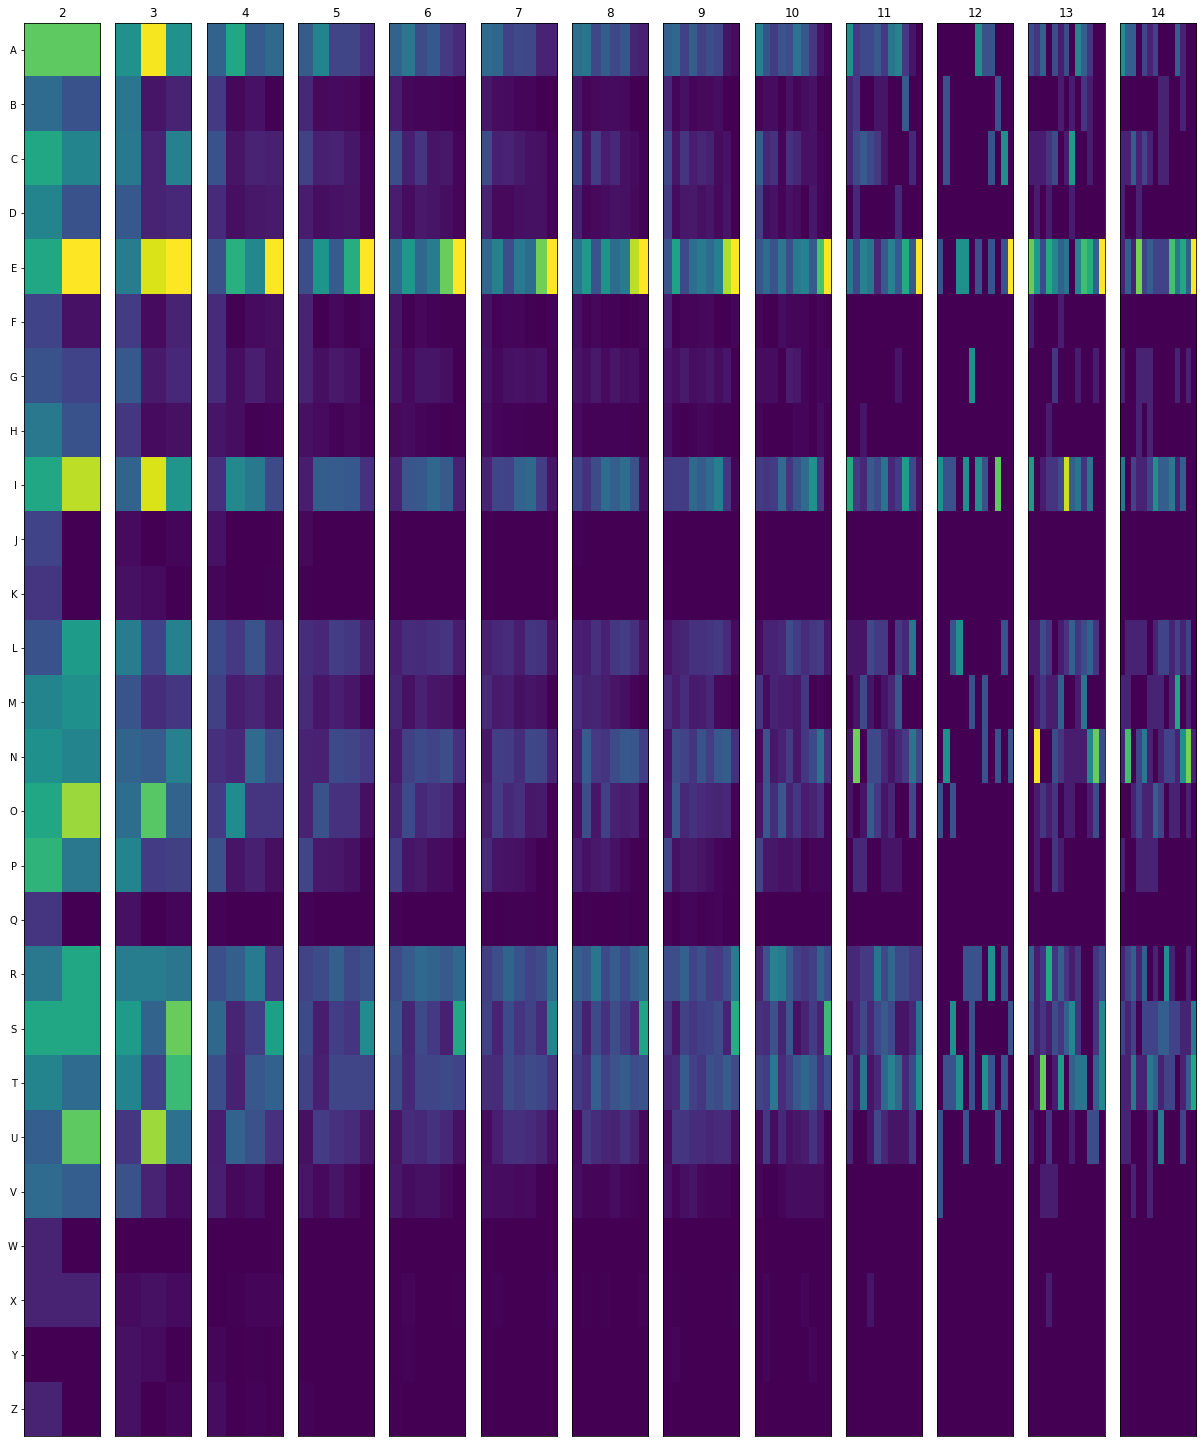

In [18]:
fig, axs = matplotlib.pyplot.subplots(
    nrows=1,
    ncols=len(lengths),
    figsize=(21, 26)
)

# vmax = max([heatmaps_words[char][length][i] for char in letters for length in lengths for i in range(length)])

for j, length in enumerate(lengths):
    arr = numpy.array([
        [
            heatmaps_words[char][length][i]
            for i in range(length) 
        ]
        for char in letters
    ])
    axs[j].imshow(arr, aspect="auto")
    axs[j].set_xticks([])
    axs[j].set_yticks([])

ticks = []
ticks_labels = []
for i, char in enumerate(letters):
    ticks.append(i)
    ticks_labels.append(char)
axs[0].set_yticks(ticks)
axs[0].set_yticklabels(ticks_labels)

for j, length in enumerate(lengths):
    axs[j].set_title(length)

matplotlib.pyplot.savefig("heatmap-words.png")